<a href="https://colab.research.google.com/github/naldo14/tesis-/blob/main/FCNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
import h5py
import sys
import numpy as np

In [3]:
#hacer el mounted de mi cuenta drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data de la universidad coreana

In [4]:
path_features="/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/features_y"
with h5py.File(path_features, 'r') as hf:
    x_features = hf['features_y'][:]

In [5]:
path_features="/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/y_targets"
with h5py.File(path_features, 'r') as hf:
    y_targets = hf['y_targets'][:]

### Data from case west reserve university DRIVE END

In [6]:
path_features="/content/drive/MyDrive/tesis USB /case west reserve university/data_1/features"
with h5py.File(path_features, 'r') as hf:
    x_features_1 = hf['features'][:]


In [7]:
path_features="/content/drive/MyDrive/tesis USB /case west reserve university/data_1/targets"
with h5py.File(path_features, 'r') as hf:
    y_targets_1 = hf['targets'][:]

### Data from case west reserve university FAN END

In [8]:
path_features="/content/drive/MyDrive/tesis USB /case west reserve university/data_2/features"
with h5py.File(path_features, 'r') as hf:
    x_features_2= hf['features'][:]


In [9]:
path_features="/content/drive/MyDrive/tesis USB /case west reserve university/data_2/targets"
with h5py.File(path_features, 'r') as hf:
    y_targets_2 = hf['targets'][:]

### Red entrenada con el data set de KIST y probada con el data set de case west drive end

In [20]:

x_shape = x_features.shape[0]
train_ratio = 0.8  # 80% for training
val_ratio = 0.2   # 20% for validation (no test set)

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_features, y_targets, test_size=val_ratio, random_state=42)

# Now, x_train, y_train, x_val, and y_val contain the data and labels for training and validation.

# Shuffle the rows (optional, you can remove this if not needed)
train_indices = np.random.permutation(len(x_train))
val_indices = np.random.permutation(len(x_val))

x_train, y_train = x_train[train_indices], y_train[train_indices]
x_val, y_val = x_val[val_indices], y_val[val_indices]

In [18]:
x_test, y_test= x_features_1,y_targets_1


Epoch 1/1000
3/3 - 2s - loss: 1.1956 - accuracy: 0.5231 - false_negatives_2: 27.0000 - false_positives_2: 4.0000 - val_loss: 1.2024 - val_accuracy: 0.4706 - val_false_negatives_2: 8.0000 - val_false_positives_2: 1.0000 - 2s/epoch - 621ms/step
Epoch 2/1000
3/3 - 0s - loss: 1.1667 - accuracy: 0.6615 - false_negatives_2: 18.0000 - false_positives_2: 4.0000 - val_loss: 1.1839 - val_accuracy: 0.6471 - val_false_negatives_2: 5.0000 - val_false_positives_2: 1.0000 - 59ms/epoch - 20ms/step
Epoch 3/1000
3/3 - 0s - loss: 1.1471 - accuracy: 0.6923 - false_negatives_2: 16.0000 - false_positives_2: 4.0000 - val_loss: 1.1722 - val_accuracy: 0.6471 - val_false_negatives_2: 5.0000 - val_false_positives_2: 1.0000 - 40ms/epoch - 13ms/step
Epoch 4/1000
3/3 - 0s - loss: 1.1309 - accuracy: 0.7077 - false_negatives_2: 15.0000 - false_positives_2: 4.0000 - val_loss: 1.1598 - val_accuracy: 0.5882 - val_false_negatives_2: 5.0000 - val_false_positives_2: 2.0000 - 62ms/epoch - 21ms/step
Epoch 5/1000
3/3 - 0s - l

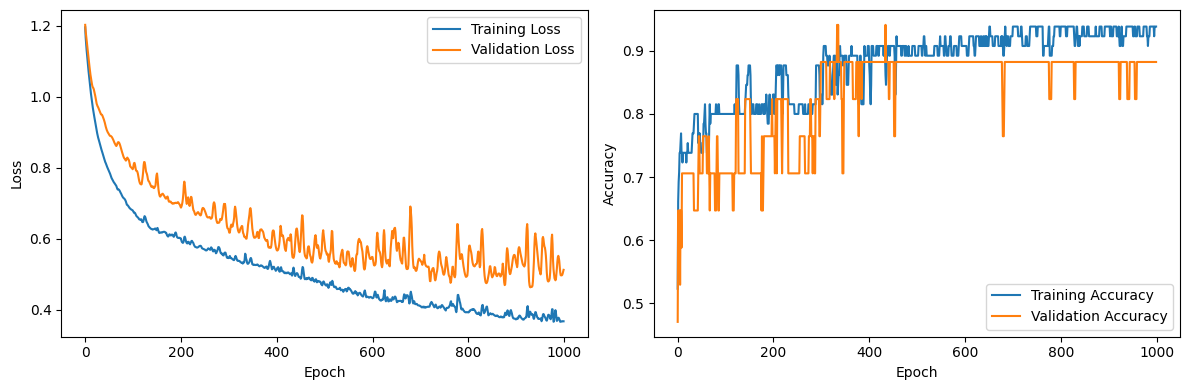

4/4 [==============================] - 0s 7ms/step - loss: 0.3471 - accuracy: 0.9231 - false_negatives_2: 5.0000 - false_positives_2: 3.0000
Test Loss: 0.3471
Test Accuracy: 92.31%
False Negatives: 5
False Positives: 3
4/4 [==============================] - 0s 5ms/step
Confusion Matrix:
[[ 5  3]
 [ 5 91]]


In [21]:

# Define the model with kernel regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(14,), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])





# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()])

# def lr_schedule(epoch):
#     if epoch < 100:
#         return 0.001  # Initial learning rate for the first 100 epochs
#     elif epoch < 200:
#         return 0.0001  # Lower learning rate for the next 100 epochs
#     else:
#         return 0.00001  # Further lower learning rate for subsequent epochs

# # Create a learning rate scheduler callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Include the callback in model training
# history = model.fit(x_train, y_train, epochs=600, validation_data=(x_val, y_val), callbacks=[lr_scheduler], verbose=2)
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_val, y_val), verbose=2)
# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Evaluate the model on the test data
test_loss, test_accuracy, false_negatives, false_positives = model.evaluate(x_test, y_test) #Returns the loss value & metrics values for the model in test mode (this is for testing time, with the testing dataset).

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"False Negatives: {false_negatives:.0f}")
print(f"False Positives: {false_positives:.0f}")

# Make predictions on test data
y_pred = model.predict(x_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(confusion)

In [22]:
del model, x_shape, train_ratio ,val_ratio,x_train, x_val, y_train, y_val,train_indices,val_indices

### Red entrenada con todos los datos de case wes drive end y KIST y probada con el data set de case west fan-end

In [23]:
###3 concateno todo
y_targets = y_targets.reshape(len(y_targets), 1)
x_features_3=np.concatenate((x_features ,x_features_1 ))
y_targets_3=np.concatenate((y_targets ,y_targets_1 ))



In [24]:

x_shape = x_features_3.shape[0]
train_ratio = 0.8  # 80% for training
val_ratio = 0.2   # 20% for validation (no test set)

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_features_3, y_targets_3, test_size=val_ratio, random_state=42)

# Now, x_train, y_train, x_val, and y_val contain the data and labels for training and validation.

# Shuffle the rows (optional, you can remove this if not needed)
train_indices = np.random.permutation(len(x_train))
val_indices = np.random.permutation(len(x_val))

x_train, y_train = x_train[train_indices], y_train[train_indices]
x_val, y_val = x_val[val_indices], y_val[val_indices]

In [25]:
x_test, y_test= x_features_2,y_targets_2


Epoch 1/1000
5/5 - 2s - loss: 1.1930 - accuracy: 0.8243 - false_negatives_3: 0.0000e+00 - false_positives_3: 26.0000 - val_loss: 1.1632 - val_accuracy: 0.8947 - val_false_negatives_3: 0.0000e+00 - val_false_positives_3: 4.0000 - 2s/epoch - 304ms/step
Epoch 2/1000
5/5 - 0s - loss: 1.1604 - accuracy: 0.8243 - false_negatives_3: 0.0000e+00 - false_positives_3: 26.0000 - val_loss: 1.1277 - val_accuracy: 0.8947 - val_false_negatives_3: 0.0000e+00 - val_false_positives_3: 4.0000 - 64ms/epoch - 13ms/step
Epoch 3/1000
5/5 - 0s - loss: 1.1312 - accuracy: 0.8243 - false_negatives_3: 0.0000e+00 - false_positives_3: 26.0000 - val_loss: 1.0932 - val_accuracy: 0.8947 - val_false_negatives_3: 0.0000e+00 - val_false_positives_3: 4.0000 - 48ms/epoch - 10ms/step
Epoch 4/1000
5/5 - 0s - loss: 1.1023 - accuracy: 0.8243 - false_negatives_3: 0.0000e+00 - false_positives_3: 26.0000 - val_loss: 1.0605 - val_accuracy: 0.8947 - val_false_negatives_3: 0.0000e+00 - val_false_positives_3: 4.0000 - 47ms/epoch - 9ms

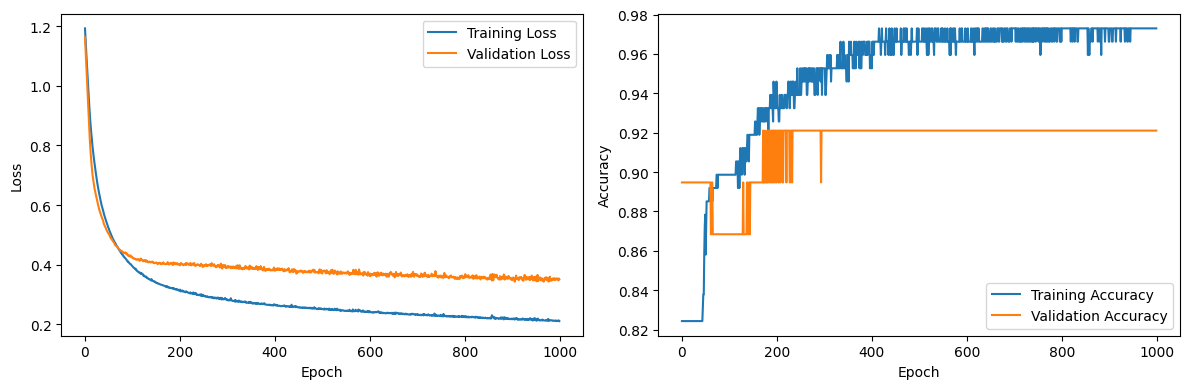

2/2 [==============================] - 0s 9ms/step - loss: 0.3677 - accuracy: 0.9531 - false_negatives_3: 3.0000 - false_positives_3: 0.0000e+00
Test Loss: 0.3677
Test Accuracy: 95.31%
False Negatives: 3
False Positives: 0
2/2 [==============================] - 0s 11ms/step
Confusion Matrix:
[[ 0  0]
 [ 3 61]]


In [26]:

### need to add some dropeout
# Define the model with kernel regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(14,), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])





# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()])

# def lr_schedule(epoch):
#     if epoch < 100:
#         return 0.001  # Initial learning rate for the first 100 epochs
#     elif epoch < 200:
#         return 0.0001  # Lower learning rate for the next 100 epochs
#     else:
#         return 0.00001  # Further lower learning rate for subsequent epochs

# # Create a learning rate scheduler callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Include the callback in model training
# history = model.fit(x_train, y_train, epochs=600, validation_data=(x_val, y_val), callbacks=[lr_scheduler], verbose=2)
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_val, y_val), verbose=2)
# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Evaluate the model on the test data
test_loss, test_accuracy, false_negatives, false_positives = model.evaluate(x_test, y_test) #Returns the loss value & metrics values for the model in test mode (this is for testing time, with the testing dataset).

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"False Negatives: {false_negatives:.0f}")
print(f"False Positives: {false_positives:.0f}")

# Make predictions on test data
y_pred = model.predict(x_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(confusion)

In [21]:
del model, x_shape, train_ratio ,val_ratio,x_train, x_val, y_train, y_val,train_indices,val_indices,x_test, y_test

### Red entrenada con todos los data set

In [10]:
y_targets = y_targets.reshape(len(y_targets), 1)
x_features_4=np.concatenate((x_features ,x_features_1,x_features_2 ))
y_targets_4=np.concatenate((y_targets ,y_targets_1,y_targets_2 ))



In [22]:


# Assuming x is your dataset with shape (70, 14) and y is your labels
x_shape = x_features_4.shape[0]
train_ratio = 0.6
val_ratio = 0.20
test_ratio = 0.20

# Split the dataset into a temporary training set and a test set
x_temp, x_test, y_temp, y_test = train_test_split(x_features_4, y_targets_4, test_size=test_ratio, random_state=42)

# Split the temporary dataset into a training set and a validation set
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=val_ratio / (1 - test_ratio), random_state=42)

# Now, x_train, y_train, x_val, y_val, x_test, and y_test contain the data and labels for each set

# Shuffle the rows
train_indices = np.random.permutation(len(x_train))
val_indices = np.random.permutation(len(x_val))
test_indices = np.random.permutation(len(x_test))

x_train, y_train = x_train[train_indices], y_train[train_indices]
x_val, y_val = x_val[val_indices], y_val[val_indices]
x_test, y_test = x_test[test_indices], y_test[test_indices]

Epoch 1/1000
5/5 - 2s - loss: 1.1894 - accuracy: 0.1667 - false_negatives_2: 125.0000 - false_positives_2: 0.0000e+00 - val_loss: 1.1693 - val_accuracy: 0.3200 - val_false_negatives_2: 34.0000 - val_false_positives_2: 0.0000e+00 - 2s/epoch - 313ms/step
Epoch 2/1000
5/5 - 0s - loss: 1.1660 - accuracy: 0.4333 - false_negatives_2: 82.0000 - false_positives_2: 3.0000 - val_loss: 1.1489 - val_accuracy: 0.7400 - val_false_negatives_2: 12.0000 - val_false_positives_2: 1.0000 - 71ms/epoch - 14ms/step
Epoch 3/1000
5/5 - 0s - loss: 1.1450 - accuracy: 0.6867 - false_negatives_2: 42.0000 - false_positives_2: 5.0000 - val_loss: 1.1300 - val_accuracy: 0.7600 - val_false_negatives_2: 10.0000 - val_false_positives_2: 2.0000 - 51ms/epoch - 10ms/step
Epoch 4/1000
5/5 - 0s - loss: 1.1251 - accuracy: 0.7333 - false_negatives_2: 33.0000 - false_positives_2: 7.0000 - val_loss: 1.1115 - val_accuracy: 0.8000 - val_false_negatives_2: 7.0000 - val_false_positives_2: 3.0000 - 47ms/epoch - 9ms/step
Epoch 5/1000
5

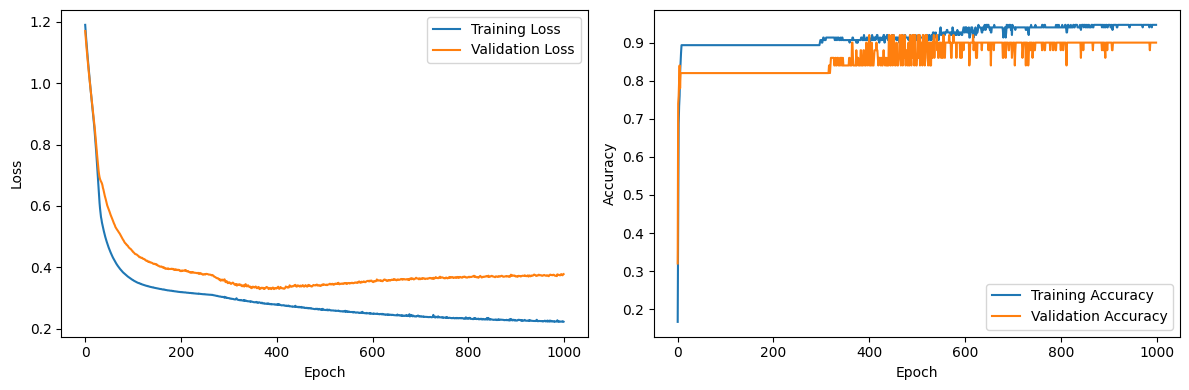

2/2 [==============================] - 0s 16ms/step - loss: 0.2467 - accuracy: 0.9600 - false_negatives_2: 1.0000 - false_positives_2: 1.0000
Test Loss: 0.2467
Test Accuracy: 96.00%
False Negatives: 1
False Positives: 1
2/2 [==============================] - 0s 6ms/step
Confusion Matrix:
[[ 4  1]
 [ 1 44]]


In [23]:

### need to add some dropeout
# Define the model with kernel regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(14,), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])





# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()])

# def lr_schedule(epoch):
#     if epoch < 100:
#         return 0.001  # Initial learning rate for the first 100 epochs
#     elif epoch < 200:
#         return 0.0001  # Lower learning rate for the next 100 epochs
#     else:
#         return 0.00001  # Further lower learning rate for subsequent epochs

# # Create a learning rate scheduler callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Include the callback in model training
# history = model.fit(x_train, y_train, epochs=600, validation_data=(x_val, y_val), callbacks=[lr_scheduler], verbose=2)
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_val, y_val), verbose=2)
# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Evaluate the model on the test data
test_loss, test_accuracy, false_negatives, false_positives = model.evaluate(x_test, y_test) #Returns the loss value & metrics values for the model in test mode (this is for testing time, with the testing dataset).

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"False Negatives: {false_negatives:.0f}")
print(f"False Positives: {false_positives:.0f}")

# Make predictions on test data
y_pred = model.predict(x_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(confusion)